# Notebook Brothers Van Gogh Letter Analysis: Vicent to Theo 

### 665 Letters sent by vicent to his brother lasting 18 years (from 1872 to 1890)

## Imports

In [51]:
#web scraping
import requests
from bs4 import BeautifulSoup
from requests_html import HTMLSession
from pprint import pprint

#text mining
from collections import Counter
import re

#classics
import pandas as pd
import numpy as np

#viz
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

## Web Srapping the info from 1 letter

In [2]:
#Importar todas as cartas do Van Gogh para 1 dataframe com 1 coluna e N linhas (N é o número de cartas)
#Ou seja, 1 carta = 1 linha .
#Após isso, ha que juntar tudo em 1 único texto, pois é assim que funciona a nuvem de palavras que irei utilizar.
#Remover stopwords
#premissa: pegar apenas palavras do VINCENT para THEO (1x1)

In [3]:
#Creating and instantiation a parsing request from beatiful soap to the website with the letters
url = 'https://vangoghletters.org/vg/letters/let001/letter.html'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [4]:
#Analyzing the HTML code in VSCode (Clean view)
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-Type"/>
  <link href="/vg/css/decovivago.css" rel="stylesheet" type="text/css"/>
  <link href="/vg/calendar/calendar-win2k-1.css" rel="stylesheet" type="text/css"/>
  <script src="/vg/calendar/calendar-min.js" type="text/javascript">
  </script>
  <script language="JavaScript" src="/vg/js/prototype.js" type="text/javascript">
  </script>
  <script language="JavaScript" src="/vg/js/scriptaculous.js" type="text/javascript">
  </script>
  <script language="JavaScript" src="/vg/js/decovivago.js" type="text/javascript">
  </script>
  <!-- generated by decovivago.rb -->
  <!-- created: Fri Oct 29 11:50:16 +0000 2021 -->
  <title>
   001 (001, 1): To Theo van Gogh. The Hague, Sunday, 29 September 1872. - Vincent van Gogh Letters
  </tit

In [5]:
#After the analysis, we want only the "div" and the p class (included the idented)
letter_html = soup.find_all("div", class_="p")
print(letter_html)

[<div class="p">The Hague, 29 September 1872.</div>, <div class="p">My dear Theo,</div>, <div class="p">Thanks for your letter, I was glad to hear that you got back safely. I missed you the first few days, and it was strange for me not to find you when I came home in the afternoon.</div>, <div class="p indent">We spent some pleasant days together, and actually did go for some walks and see a thing or two whenever we had the chance.</div>, <div class="p indent">What terrible weather, you must feel <i>anxious</i> on your walks to Oisterwijk.<span class="anchor"><a href="#" id="translation-noteref-n-1" name="translation-noteref-n-1" onclick="javascript:columns.showNote(this,'n-1');return false;" title="click to open or close note">1</a></span> Yesterday there were trotting races on the occasion of the exhibition,<span class="anchor"><a href="#" id="translation-noteref-n-2" name="translation-noteref-n-2" onclick="javascript:columns.showNote(this,'n-2');return false;" title="click to open o

In [6]:
#Finding all the div and the p class, and instantiating inside a list
letter_html = soup.find_all("div", class_=["p", "indent"])
letter_html

[<div class="p">The Hague, 29 September 1872.</div>,
 <div class="p">My dear Theo,</div>,
 <div class="p">Thanks for your letter, I was glad to hear that you got back safely. I missed you the first few days, and it was strange for me not to find you when I came home in the afternoon.</div>,
 <div class="p indent">We spent some pleasant days together, and actually did go for some walks and see a thing or two whenever we had the chance.</div>,
 <div class="p indent">What terrible weather, you must feel <i>anxious</i> on your walks to Oisterwijk.<span class="anchor"><a href="#" id="translation-noteref-n-1" name="translation-noteref-n-1" onclick="javascript:columns.showNote(this,'n-1');return false;" title="click to open or close note">1</a></span> Yesterday there were trotting races on the occasion of the exhibition,<span class="anchor"><a href="#" id="translation-noteref-n-2" name="translation-noteref-n-2" onclick="javascript:columns.showNote(this,'n-2');return false;" title="click to op

In [7]:
#Extracting only the words in the letter
letter = []
for sentence in letter_html:
    string = sentence.string
    if string:
        letter.append(string)

letter = letter[:-2] #pegar tudo menos os últimos 2 itens da lista.

letter

['The Hague, 29 September 1872.',
 'My dear Theo,',
 'Thanks for your letter, I was glad to hear that you got back safely. I missed you the first few days, and it was strange for me not to find you when I came home in the afternoon.',
 'We spent some pleasant days together, and actually did go for some walks and see a thing or two whenever we had the chance.',
 'Your loving',
 'Vincent']

### ☝️ Great, work done!

### 👇 Now bellow let's get the number of the Gogh's letters there are for Theo only

In [8]:
#Now I need to obtain the number of the letters from vincent to theo:
link2 = "https://vangoghletters.org/vg/letters.html"
response2 = requests.get(link2)
soup2 = BeautifulSoup(response2.content, 'html.parser')

In [9]:
letter_html2 = soup2.find_all("div", id="searchresult")
print(letter_html2)

[<div id="searchresult"><ul>
<li value="001"><a href="/vg/letters/let001/letter.html">001   To Theo van Gogh. The Hague, Sunday, 29 September 1872.</a></li>
<li value="001a"><a href="/vg/letters/let001a/letter.html">001a   To Hendrik Verzijl. The Hague, Saturday, 26 October 1872.</a></li>
<li value="002"><a href="/vg/letters/let002/letter.html">002   To Theo van Gogh. The Hague, Friday, 13 December 1872.</a></li>
<li value="003"><a href="/vg/letters/let003/letter.html">003   To Theo van Gogh. The Hague, mid-January 1873.</a></li>
<li value="004"><a href="/vg/letters/let004/letter.html">004   To Theo van Gogh. The Hague, Tuesday, 28 January 1873.</a></li>
<li value="005"><a href="/vg/letters/let005/letter.html">005   To Theo van Gogh. The Hague, Monday, 17 March 1873.</a></li>
<li value="006"><a href="/vg/letters/let006/letter.html">006   To Theo van Gogh. The Hague, Monday, 24 March 1873.</a></li>
<li value="007"><a href="/vg/letters/let007/letter.html">007   To Theo van Gogh. The Hagu

In [10]:
#Extracting only the words in the letter
letter2 = []
for sentence in letter_html2:
    string2 = sentence.get_text(strip=True)
    if string2:
        letter2.append(string2)


print(letter2)

['001 \xa0 To Theo van Gogh. The Hague, Sunday, 29 September 1872.001a \xa0 To Hendrik Verzijl. The Hague, Saturday, 26 October 1872.002 \xa0 To Theo van Gogh. The Hague, Friday, 13 December 1872.003 \xa0 To Theo van Gogh. The Hague, mid-January 1873.004 \xa0 To Theo van Gogh. The Hague, Tuesday, 28 January 1873.005 \xa0 To Theo van Gogh. The Hague, Monday, 17 March 1873.006 \xa0 To Theo van Gogh. The Hague, Monday, 24 March 1873.007 \xa0 To Theo van Gogh. The Hague, Monday, 5 May 1873.008 \xa0 To Theo van Gogh. The Hague, Friday, 9 May 1873.009 \xa0 To Theo van Gogh. London, Friday, 13 June 1873.010 \xa0 To Willem and Caroline van Stockum-Haanebeek. London, Wednesday, 2 July 1873.011 \xa0 To Theo van Gogh. London, Sunday, 20 July 1873.012 \xa0 To Willem and Caroline van Stockum-Haanebeek. London, Thursday, 7 August 1873.013 \xa0 To Theo van Gogh. London, Saturday, 13 September 1873.014 \xa0 To Willem and Caroline van Stockum-Haanebeek. London, between about Thursday, 16 October and Fr

In [11]:
letter2

['001 \xa0 To Theo van Gogh. The Hague, Sunday, 29 September 1872.001a \xa0 To Hendrik Verzijl. The Hague, Saturday, 26 October 1872.002 \xa0 To Theo van Gogh. The Hague, Friday, 13 December 1872.003 \xa0 To Theo van Gogh. The Hague, mid-January 1873.004 \xa0 To Theo van Gogh. The Hague, Tuesday, 28 January 1873.005 \xa0 To Theo van Gogh. The Hague, Monday, 17 March 1873.006 \xa0 To Theo van Gogh. The Hague, Monday, 24 March 1873.007 \xa0 To Theo van Gogh. The Hague, Monday, 5 May 1873.008 \xa0 To Theo van Gogh. The Hague, Friday, 9 May 1873.009 \xa0 To Theo van Gogh. London, Friday, 13 June 1873.010 \xa0 To Willem and Caroline van Stockum-Haanebeek. London, Wednesday, 2 July 1873.011 \xa0 To Theo van Gogh. London, Sunday, 20 July 1873.012 \xa0 To Willem and Caroline van Stockum-Haanebeek. London, Thursday, 7 August 1873.013 \xa0 To Theo van Gogh. London, Saturday, 13 September 1873.014 \xa0 To Willem and Caroline van Stockum-Haanebeek. London, between about Thursday, 16 October and Fr

In [12]:
letter2[0]

'001 \xa0 To Theo van Gogh. The Hague, Sunday, 29 September 1872.001a \xa0 To Hendrik Verzijl. The Hague, Saturday, 26 October 1872.002 \xa0 To Theo van Gogh. The Hague, Friday, 13 December 1872.003 \xa0 To Theo van Gogh. The Hague, mid-January 1873.004 \xa0 To Theo van Gogh. The Hague, Tuesday, 28 January 1873.005 \xa0 To Theo van Gogh. The Hague, Monday, 17 March 1873.006 \xa0 To Theo van Gogh. The Hague, Monday, 24 March 1873.007 \xa0 To Theo van Gogh. The Hague, Monday, 5 May 1873.008 \xa0 To Theo van Gogh. The Hague, Friday, 9 May 1873.009 \xa0 To Theo van Gogh. London, Friday, 13 June 1873.010 \xa0 To Willem and Caroline van Stockum-Haanebeek. London, Wednesday, 2 July 1873.011 \xa0 To Theo van Gogh. London, Sunday, 20 July 1873.012 \xa0 To Willem and Caroline van Stockum-Haanebeek. London, Thursday, 7 August 1873.013 \xa0 To Theo van Gogh. London, Saturday, 13 September 1873.014 \xa0 To Willem and Caroline van Stockum-Haanebeek. London, between about Thursday, 16 October and Fri

In [13]:
df = pd.DataFrame(data=letter2)
df

,0
0,"001 To Theo van Gogh. The Hague, Sunday, 29 ..."


In [14]:
df[0]

0    001   To Theo van Gogh. The Hague, Sunday, 29 ...
Name: 0, dtype: object

In [15]:
#df[0] = df[0].str.split(r'(?=\d{3}\s) To Theo')
df[0] = df[0].str.split(r'(?=\d{3}\s+To Theo van Gogh)') #importante aqui: estou splitando em outras listas tudo que for 3 digitos + palavra to theo van gogh
#r'':raw string
#(?=...):Lookahead assertion divisão ocorrerá antes do padrão que ele encontrar, sem remover o padrão em si do texto.
#\d{3}:três dígitos consecutivos
#\s+:um ou mais espaços em branco
df[0]

0    [, 001   To Theo van Gogh. The Hague, Sunday, ...
Name: 0, dtype: object

In [16]:
df

,0
0,"[, 001 To Theo van Gogh. The Hague, Sunday, ..."


In [17]:
df_dividido = df.explode(0).reset_index(drop=True)
df_dividido

,0
0,
1,"001 To Theo van Gogh. The Hague, Sunday, 29 ..."
2,"002 To Theo van Gogh. The Hague, Friday, 13 ..."
3,"003 To Theo van Gogh. The Hague, mid-January..."
4,"004 To Theo van Gogh. The Hague, Tuesday, 28..."
...,...
651,"891 To Theo van Gogh. Auvers-sur-Oise, Tuesd..."
652,"893 To Theo van Gogh. Auvers-sur Oise, Satur..."
653,896 To Theo van Gogh and Jo van Gogh-Bonger....
654,898 To Theo van Gogh and Jo van Gogh-Bonger....


In [18]:
df_dividido

,0
0,
1,"001 To Theo van Gogh. The Hague, Sunday, 29 ..."
2,"002 To Theo van Gogh. The Hague, Friday, 13 ..."
3,"003 To Theo van Gogh. The Hague, mid-January..."
4,"004 To Theo van Gogh. The Hague, Tuesday, 28..."
...,...
651,"891 To Theo van Gogh. Auvers-sur-Oise, Tuesd..."
652,"893 To Theo van Gogh. Auvers-sur Oise, Satur..."
653,896 To Theo van Gogh and Jo van Gogh-Bonger....
654,898 To Theo van Gogh and Jo van Gogh-Bonger....


In [19]:
df_number = df_dividido[0].str.extract(r'(\d{3})')
df_number = df_number.dropna()
df_number

,0
1,001
2,002
3,003
4,004
5,005
...,...
651,891
652,893
653,896
654,898


In [20]:
list_letters = df_number[0].tolist()
list_letters

['001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '011',
 '013',
 '015',
 '017',
 '019',
 '021',
 '022',
 '023',
 '025',
 '026',
 '027',
 '028',
 '029',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '037',
 '038',
 '039',
 '040',
 '041',
 '042',
 '044',
 '046',
 '047',
 '048',
 '049',
 '050',
 '051',
 '052',
 '053',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '060',
 '061',
 '062',
 '065',
 '066',
 '067',
 '068',
 '069',
 '070',
 '071',
 '072',
 '073',
 '077',
 '078',
 '079',
 '080',
 '081',
 '082',
 '083',
 '084',
 '085',
 '086',
 '087',
 '088',
 '089',
 '090',
 '091',
 '092',
 '093',
 '095',
 '096',
 '097',
 '099',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '140',
 '141',
 '142',
 '143',


In [46]:
print(f'Unique Vincent to Theo letters: {len(list_letters)}')

Unique Vincent to Theo letters: 655


## Now that we have the list of the letters, let's put it all in one dataframe

In [22]:
#Commenting this cell because de web scraping took 10min to finish.

# full_text = ""

# for num in list_letters:
#     url = f'https://vangoghletters.org/vg/letters/let{num}/letter.html'
#     response = requests.get(url)
#     soup = BeautifulSoup(response.content, 'html.parser')
#     letter_html = soup.find_all("div", class_="p")

#     list_letter = []
#     for sentence in letter_html:
#         string = sentence.string
#         if string:
#             list_letter.append(string)

#     # Juntar as sentenças em uma única string para formar a carta
#     letter = " ".join(list_letter)

#     # Remover os dois últimos caracteres da string (sujeira)
#     letter = letter[:-2]

#     # Adicionar o texto da carta ao texto completo
#     full_text += letter

# print(full_text)

In [23]:
# full_text[-500:]

In [24]:
#Remover palavras indesejadas > Regex???

In [25]:
# import pickle

# # Caminho onde o arquivo será salvo
# file_path = '/home/fernando_cir/code/thecirocks/fer_projects/gogh/data/full_text.pkl'

# # Salvando a variável full_text
# with open(file_path, 'wb') as file:
#     pickle.dump(full_text, file)

In [26]:
#Open file:
import pickle

file_path = '/home/fernando_cir/code/thecirocks/fer_projects/gogh/data/full_text.pkl'
with open(file_path, 'rb') as file:
    full_text = pickle.load(file)

print(full_text)

The Hague, 29 September 1872. My dear Theo, Thanks for your letter, I was glad to hear that you got back safely. I missed you the first few days, and it was strange for me not to find you when I came home in the afternoon. We spent some pleasant days together, and actually did go for some walks and see a thing or two whenever we had the chance. Your loving Vincent Original manuscript Amsterdam, Van Gogh Museum, inv. no. b1 V/19The Hague, 13 December 1872. My dear Theo, I don’t doubt that it will give you pleasure, it’s such a fine firm. It will be a big change for you. I hope so much to see you before you leave, we’ll have a lot to talk about. I believe that Brussels is a very pleasant city, though it will seem strange at first. At all events, write to me soon. And now adieu, these are only a few words written in haste, but I just had to tell you how very glad I was. I wish you well, and believe me ever, Your loving brother Vincent Original manuscript Amsterdam, Van Gogh Museum, inv. n

In [27]:
text = 'Original manuscript Amsterdam, Van Gogh Museum, inv. nos.'

if text in full_text:
    print("It is in")
else:
    print("not in")

It is in


In [28]:
full_text = full_text.replace('Original manuscript Amsterdam, Van Gogh Museum, inv. nos. ', '')

In [29]:
text = '[Appendix 1]'

if text in full_text:
    print("It is in")
else:
    print("not in")

It is in


In [30]:
full_text = re.sub(r'Appendix [1-3]', '', full_text)

In [31]:
text = '[Appendix 1]'

if text in full_text:
    print("It is in")
else:
    print("not in")

not in


In [32]:
text = 'b699 a-c V/1962 Sheets 2 and 3 were originally joine'

if text in full_text:
    print("It is in")
else:
    print("not in")

It is in


In [33]:
#Using regex to remove certain patter from the bottom of the pages
#pattern = r'[a-zA-Z]\d{3} a-c V\/\d{4} Sheet(s)? \d+ and \d+ were originally joined'
pattern = r'[a-zA-Z]\d{3} a-c V\/\d{4} Sheet(s)? \d+ and \d+ were originally'

#Explanation:

#original text: b699 a-c V/1962 Sheets 2 and 3 were originally joine
#[a-zA-Z]\d{3} finds any code like 'b699'
#\d{4} finds 4 digit from the year like 1962
#Sheet(s)? \d+ and \d+ finds sheets or sheet

full_text = re.sub(pattern, ' ', full_text).strip()
#replaces the patter for blank space, and with this eliminates those spaces

In [34]:
text = 'b699 a-c V/1962 Sheets 2 and 3 were originally joine'

if text in full_text:
    print("It is in")
else:
    print("not in")

not in


In [35]:
#Using regex function with '\b\w+\b' to find any word:
# \b represents word bondary at the begining and at the end
# \w+ represents any caracter
palavras = re.findall(r'\b\w+\b', full_text)
print(palavras)

['The', 'Hague', '29', 'September', '1872', 'My', 'dear', 'Theo', 'Thanks', 'for', 'your', 'letter', 'I', 'was', 'glad', 'to', 'hear', 'that', 'you', 'got', 'back', 'safely', 'I', 'missed', 'you', 'the', 'first', 'few', 'days', 'and', 'it', 'was', 'strange', 'for', 'me', 'not', 'to', 'find', 'you', 'when', 'I', 'came', 'home', 'in', 'the', 'afternoon', 'We', 'spent', 'some', 'pleasant', 'days', 'together', 'and', 'actually', 'did', 'go', 'for', 'some', 'walks', 'and', 'see', 'a', 'thing', 'or', 'two', 'whenever', 'we', 'had', 'the', 'chance', 'Your', 'loving', 'Vincent', 'Original', 'manuscript', 'Amsterdam', 'Van', 'Gogh', 'Museum', 'inv', 'no', 'b1', 'V', '19The', 'Hague', '13', 'December', '1872', 'My', 'dear', 'Theo', 'I', 'don', 't', 'doubt', 'that', 'it', 'will', 'give', 'you', 'pleasure', 'it', 's', 'such', 'a', 'fine', 'firm', 'It', 'will', 'be', 'a', 'big', 'change', 'for', 'you', 'I', 'hope', 'so', 'much', 'to', 'see', 'you', 'before', 'you', 'leave', 'we', 'll', 'have', 'a',

In [36]:
contador_palavras = Counter(palavras)
print(contador_palavras)

Counter({'I': 6284, 'the': 6193, 'to': 4947, 'and': 4272, 'that': 3617, 'a': 3517, 'of': 3237, 'in': 2854, 'it': 2663, 'you': 2615, 'for': 1763, 's': 1607, 't': 1586, 'be': 1399, 'me': 1331, 'is': 1290, 'have': 1241, 'my': 1177, 'with': 1170, 'as': 1155, 'on': 954, 'one': 923, 'no': 860, 'if': 839, 'this': 816, 'but': 801, 'll': 796, 'or': 790, 'more': 787, 'at': 739, 'V': 724, 'Vincent': 718, 'm': 708, 'Theo': 706, 'can': 706, 'not': 703, 'so': 675, 'And': 669, 'we': 665, 'all': 633, 'dear': 631, 'what': 624, 'do': 615, 'from': 612, 'would': 610, 'about': 609, 'there': 586, 'will': 577, 'by': 544, 'Gogh': 542, 'your': 523, 'Van': 516, 'But': 516, 'very': 515, 'are': 515, 'work': 507, 'Amsterdam': 503, 'The': 500, 'was': 489, 've': 477, 'which': 471, 'inv': 459, 'he': 455, 'Museum': 454, 'Original': 446, 'manuscript': 445, 'now': 442, 'like': 442, 'don': 437, 'than': 436, 'see': 427, 'them': 419, 'things': 417, 'time': 403, 'here': 400, 'much': 397, 'something': 397, 'because': 395, 'y

In [37]:
contador_palavras.items()

dict_items([('The', 500), ('Hague', 50), ('29', 6), ('September', 10), ('1872', 2), ('My', 282), ('dear', 631), ('Theo', 706), ('Thanks', 32), ('for', 1763), ('your', 523), ('letter', 333), ('I', 6284), ('was', 489), ('glad', 37), ('to', 4947), ('hear', 41), ('that', 3617), ('you', 2615), ('got', 58), ('back', 178), ('safely', 4), ('missed', 3), ('the', 6193), ('first', 152), ('few', 183), ('days', 186), ('and', 4272), ('it', 2663), ('strange', 18), ('me', 1331), ('not', 703), ('find', 173), ('when', 367), ('came', 44), ('home', 100), ('in', 2854), ('afternoon', 13), ('We', 90), ('spent', 18), ('some', 303), ('pleasant', 20), ('together', 95), ('actually', 45), ('did', 78), ('go', 254), ('walks', 4), ('see', 427), ('a', 3517), ('thing', 173), ('or', 790), ('two', 129), ('whenever', 3), ('we', 665), ('had', 343), ('chance', 36), ('Your', 134), ('loving', 116), ('Vincent', 718), ('Original', 446), ('manuscript', 445), ('Amsterdam', 503), ('Van', 516), ('Gogh', 542), ('Museum', 454), ('in

In [38]:
contador_palavras

Counter({'I': 6284,
         'the': 6193,
         'to': 4947,
         'and': 4272,
         'that': 3617,
         'a': 3517,
         'of': 3237,
         'in': 2854,
         'it': 2663,
         'you': 2615,
         'for': 1763,
         's': 1607,
         't': 1586,
         'be': 1399,
         'me': 1331,
         'is': 1290,
         'have': 1241,
         'my': 1177,
         'with': 1170,
         'as': 1155,
         'on': 954,
         'one': 923,
         'no': 860,
         'if': 839,
         'this': 816,
         'but': 801,
         'll': 796,
         'or': 790,
         'more': 787,
         'at': 739,
         'V': 724,
         'Vincent': 718,
         'm': 708,
         'Theo': 706,
         'can': 706,
         'not': 703,
         'so': 675,
         'And': 669,
         'we': 665,
         'all': 633,
         'dear': 631,
         'what': 624,
         'do': 615,
         'from': 612,
         'would': 610,
         'about': 609,
         'there': 586,
    

In [39]:
#After analyzing the Counter,
# I suggest Words to remove: Museum, Original, manuscript, numbers (especialy 1), Amsterdam, 1962, 19My, 188My

In [53]:
print(f'There are {len(full_text)} words in the letters before removing stopwords')

There are 916518 words in the letters before removing stopwords


## Stopwords

In [55]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [69]:
stopwords.update(["I", "Museum", "Original", "manuscript", "Amsterdam", "1962", "19My", "188My", "ll", "t", "s", "one", "d", "b", "isn", "m", "ve"])
stopwords.update({str(i) for i in range(10)})

## Instantiating wordcloud

In [70]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color = "black",
                      width=1600, height=800).generate(full_text)

## Plotting

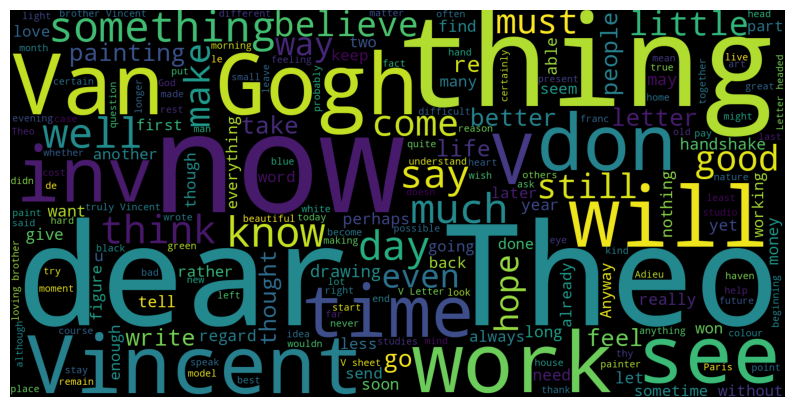

In [71]:
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

In [73]:
mask = np.array(Image.open('vicent.jpg'))
mask

array([[[149, 174, 155],
        [150, 175, 156],
        [148, 173, 154],
        ...,
        [ 70,  84,  84],
        [  7,  17,  16],
        [  0,   4,   4]],

       [[134, 159, 140],
        [141, 166, 147],
        [144, 169, 150],
        ...,
        [ 89, 103, 103],
        [ 38,  47,  46],
        [  2,   6,   7]],

       [[131, 156, 137],
        [143, 168, 149],
        [150, 175, 156],
        ...,
        [ 94, 108, 108],
        [ 66,  75,  74],
        [  0,   2,   3]],

       ...,

       [[125, 131, 127],
        [120, 126, 122],
        [118, 124, 120],
        ...,
        [100,  92,  81],
        [ 89,  82,  74],
        [  4,   0,   0]],

       [[117, 123, 119],
        [118, 124, 120],
        [122, 128, 124],
        ...,
        [101,  94,  86],
        [ 85,  80,  74],
        [ 15,  12,   7]],

       [[  0,   5,   1],
        [  0,   4,   0],
        [  0,   2,   0],
        ...,
        [  4,   0,   0],
        [  9,   5,   2],
        [  3,   0,   0]]

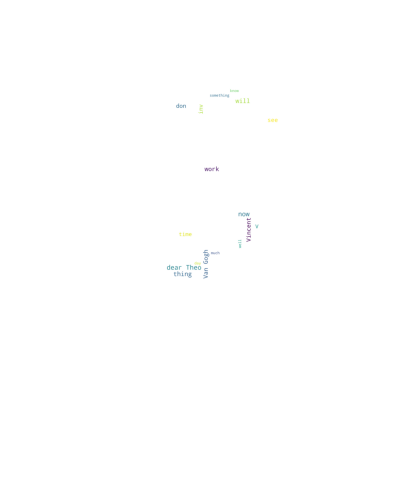

In [78]:
mask = np.array(Image.open('/home/fernando_cir/code/thecirocks/fer_projects/gogh/vicent.jpg'))

mask = np.where(mask > 128, 255, 0)

wordcloud = WordCloud(stopwords=stopwords,
                      background_color = "white",
                      #max_words=2000,
                      mask=mask,
                      max_font_size=500,
                      min_font_size=30,
                      width=1684, height=2048).generate(full_text)


# wordcloud = WordCloud(stopwords=stopwords,
#                       background_color="white",  # ou tente "black" para mais contraste
#                       max_words=2000,
#                       mask=mask,
#                       max_font_size=300,  # Aumente o tamanho máximo da fonte
#                       min_font_size=10,   # Aumente o tamanho mínimo para garantir legibilidade
#                       width=2000,         # Aumentar a resolução
#                       height=2500,        # Aumentar a resolução
#                       contour_color='black',  # Adiciona contorno às palavras
#                       contour_width=1     # Define a largura do contorno
#                      ).generate(full_text)



fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);